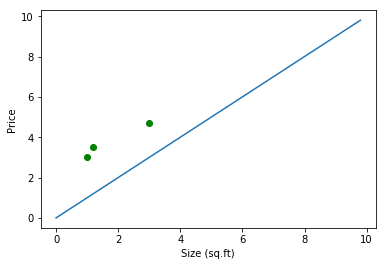

In [0]:
# A simple example of an animated plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

# Initial plot
x = np.arange(0., 10., 0.2)
y = np.arange(0., 10., 0.2)
line, = ax.plot(x, y)

plt.rcParams["figure.figsize"] = (10,8)
plt.ylabel("Price")
plt.xlabel("Size (sq.ft)")
plt.plot([1, 1.2, 3], [3, 3.5, 4.7], 'go', label='Training data')
#ax.plot(test_house_size, test_house_price, 'mo', label='Testing data')

def animate(i):
    print(i)    
    x = np.arange(0., 6, 0.05)
    line.set_xdata(x)  # update the data
    line.set_ydata( x ** (1 + (i/10.0)))  # update the data

    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(y)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, 10), init_func=init, interval=1000, blit=True)
plt.show()

#1. Carregar imagem
Nas próximas seções, iremos aprender como carregar imagens de duas fontes distintas para exibí-las através de nosso código: (a) Internet e (b) diretório de seu próprio google drive. Também, veremos qual vantagem cada uma das formas de aquisição. 

##  1.1 URLs
A vantagem de carregarmos imagens diretamente de *urls* é que ela não precisamos nos preocupar com a aquisição ou armazenamento dela de forma direta. Ou seja, podemos acessá-la e exibí-la diretamente através de seu *link*. Será mostrado duas formas de acessá-las e exibí-las logo a seguir

###  1.1.1 OpenCV + matplot + urllib

In [0]:
#Importação das bibliotecas que iremos utilizar
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt


I = url_to_image("https://live.staticflickr.com/65535/48055207731_98367225e3_m.jpg")
# se conseguiu carregar a imagem
if(I is not None):
  # exibe a imagem
  plt.show()


def url_to_image(url):
  # Abre a url para acessar o dado
  resp = urllib.request.urlopen(url)
  # conversão da imagem para array de bytes do tamanho de inteiros de 8 bits
  image_array = np.asarray(bytearray(resp.read()), dtype="uint8")
  # conversão do array para imagem
  image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
  
  # verifica se a imagem possui 3 dimensões: altura, largura e número de canais
  if (len(image.shape)==3):
    # remove os informações dos eixos de coordenadas
    plt.axis("off")
    # converte a imagem de bgr para rgb
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # adiciona a imagem no plot
    plt.imshow(image_rgb)
    # retorna
    return image_rgb
  
  # caso não possua as 3 informações, então ou o link é inválido ou o dado 
  # não é imagem
  else:
    print('Erro to load image !!') 
  return None

###  1.1.2 Pil.Image + comandos Linux

In [0]:
import PIL.Image

def show_results(content_path, max_dim):
  #plt.figure(figsize=(10, 5))
  content = img = PIL.Image.open(content_path)

  long = max(img.size)
  scale = max_dim/long
  img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), PIL.Image.ANTIALIAS)
  #plt.subplot(1, 2, 1)
  plt.imshow(img)
    
!wget --quiet -P /tmp/nst/ https://live.staticflickr.com/65535/48055207731_98367225e3_m.jpg
show_results("/tmp/nst/48055207731_98367225e3_m.jpg", 256)

##  1.2 Arquivos no gdrive
A vantagem de carregarmos imagens diretamente do gdrive pessoal é que não precisamos nos preocupar com o fato da página estar acessível ou não. No entanto, é necessário seguir os seguintes passos:  
- executar o código 
- clicar no *link* que aparecer
- dar autorização
- copiar o código gerado e
- colar na barra que apareceu colab  

É importante informar que outras pessoas não terão acesso as imagens dessa forma, mesmo que você torne as imagens públicas.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

###  1.2.1 Usando OpenCV + Matplotlib

In [0]:
import cv2
import matplotlib.pyplot as plt

# carrega a imagem
bgr_img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/docencia/MLP/figuras/decisao_linear.png')

plt.axis("off")

# adiciona a imagem no plot e exibe
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

###  1.2.2  Usando Ipython.display

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


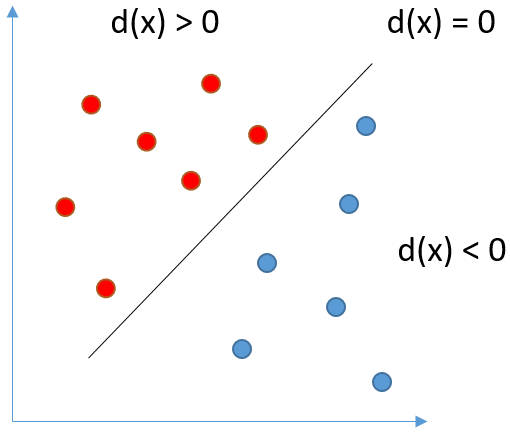

In [0]:
from IPython.display import Image

# carrega, adiciona no display e exibe
Image(filename="/content/gdrive/My Drive/Colab Notebooks/docencia/MLP/figuras/decisao_linear.png")



In [0]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)
  
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
  
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

#plt.show()
#rc('animation', html='jshtml')

HTML(anim.to_jshtml())
#anim


#2. Matplotlib
Essa seção fornece algumas dicas básicas para utilização da biblioteca matplotlib, principal biblioteca utilizada para exibição de imagens e gráficos no python

In [0]:
# Testei ams não funcionou. Não apareceu UI
!jupyter nbextension install https://bitbucket.org/ipre/calico/downloads/calico-document-tools-1.0.zip
!jupyter nbextension enable calico-document-tools

Please supply at least one subcommand: disable, enable, install, list, uninstall
Enabling notebook extension calico-document-tools...
      - Validating: OK


In [0]:
#%matplotlib inline

#from IPython.core.magics.display import Javascript
#Javascript(""""load_extensions": {"calico-spell-check":true,
#                      "calico-document-tools":true,
#                      "calico-cell-tools":true""")

#%#javascript 
#IPython.notebook.config.update({
#  "load_extensions": {"calico-spell-check":true,
#                      "calico-document-tools":true,
#                      "calico-cell-tools":true
#                     }
#})


# Testei ams não funcionou. Não apareceu UI
# https://github.com/takluyver/cite2c
# https://pypi.org/project/cite2c/
#!pip install cite2c
#!python -m cite2c.install

In [0]:
!sudo apt-get install texlive-latex-extra
!sudo apt-get install texlive-bibtex-extra

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils gho



AAAAAAAAAAAAAA  <cite data-cite="PER-GRA:2007">(Granger, 2013)</cite>
  
  


<figure>
   <a href="https://www.fullstackpython.com/img/logos/markdown.png">
   <img src="https://www.fullstackpython.com/img/logos/markdown.png" alt="You can use Markdown to add images to Jupyter Notebook files, such as this image of the Markdown logo. Source: Full Stack Python."></a>
   <figcaption> You can use Markdown to add images to Jupyter Notebook files, such as this image of the Markdown logo. Source: Full Stack Python.
   </figcaption>
</figure>


@article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}


Referências citation <a name="ref-1"/>[(Pérez and Granger, 2007)](#cite-PER-GRA:2007)  
[1] https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python#anatomy

<cite data-cite="granger2013">(Granger, 2013)</cite>

<strong data-cite="granger2013">(Granger, 2013)</strong>

In [0]:
# nbconvert funcionou. No entanto, os outros comandos não
%%bash
ls
jupyter nbconvert aula_utils.ipynb --to latex
#python latex aula_utils.tex
#!python bibtex aula_utils.aux
#!python pdflatex aula_utils.tex
#!python pdflatex aula_utils.tex
pdflatex aula_utils.tex

aula_utils_files
aula_utils.ipynb
aula_utils.tex
citations.tplx
ref.bib
sample_data


[NbConvertApp] Converting notebook aula_utils.ipynb to latex
[NbConvertApp] Support files will be in aula_utils_files/
[NbConvertApp] Making directory aula_utils_files
[NbConvertApp] Making directory aula_utils_files
[NbConvertApp] Writing 65630 bytes to aula_utils.tex
bash: line 7: pdflatex: command not found


In [0]:
%%bash
# mudar para o diretório onde está o notebook que será convertido
%cd "/content/drive/My Drive/Colab Experimental/mltutorial/"
ipython nbconvert mynotebook.ipynb --to latex --template citations.tplx
latex mynotebook.tex
bibtex mynotebook.aux
pdflatex mynotebook.tex
pdflatex mynotebook.tex
pdflatex mynotebook.tex

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook mynotebook.ipynb to latex
[NbConvertApp] Writing 20861 bytes to mynotebook.tex
bash: line 3: latex: command not found
bash: line 4: bibtex: command not found
bash: line 5: pdflatex: command not found
bash: line 6: pdflatex: command not found
bash: line 7: pdflatex: command not found


In [0]:
#!pip install cite2c
#!python3 -m cite2c.install

Installing nbextension ...
Enabling the nbextension ...
Enabling the server extension ...
Done.



<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

-->

In [0]:
# NÃO FINCIONOU - não carrega o arquivo com o comando load
# - o colab abre arquivos somente como leitura. Não dá para editar
# - tentei gambi para editar o conf.py, deu
# - tentei gambi para jogar o notebook na pasta source do projeto sphinx e encontrei 2 problemas:
# - 1: tudo copiado para a pasta Files é deletado quando você sai
# - 2:  
# https://sphinxcontrib-bibtex.readthedocs.io/en/latest/quickstart.html#overview
#!pip install sphinxcontrib-bibtex
#!sphinx-quickstart
#!cd /content/docs/source/
#%load conf.py
#%pycat code.py 
#!rm code.py
#%%writefile conf.py 
# -*- coding: utf-8 -*-
#
# Configuration file for the Sphinx documentation builder.
#
# This file does only contain a selection of the most common options. For a
# full list see the documentation:
# http://www.sphinx-doc.org/en/master/config

# -- Path setup --------------------------------------------------------------

# If extensions (or modules to document with autodoc) are in another directory,
# add these directories to sys.path here. If the directory is relative to the
# documentation root, use os.path.abspath to make it absolute, like shown here.
#
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
sys.setrecursionlimit(1500)

# -- Project information -----------------------------------------------------

project = u'teste_sphinxlib'
copyright = u'2019, Thales'
author = u'Thales'

# The short X.Y version
version = u''
# The full version, including alpha/beta/rc tags
release = u'0.0.1'


# -- General configuration ---------------------------------------------------

# If your documentation needs a minimal Sphinx version, state it here.
#
# needs_sphinx = '1.0'

# Add any Sphinx extension module names here, as strings. They can be
# extensions coming with Sphinx (named 'sphinx.ext.*') or your custom
# ones.
extensions = [
    'sphinx.ext.autodoc',
    'sphinx.ext.ifconfig',
    'sphinx.ext.viewcode',
    'sphinx.ext.githubpages',
    'sphinxcontrib.bibtex',
]

# Add any paths that contain templates here, relative to this directory.
templates_path = ['_templates']

# The suffix(es) of source filenames.
# You can specify multiple suffix as a list of string:
#
# source_suffix = ['.rst', '.md']
source_suffix = '.rst'

# The master toctree document.
master_doc = 'index'

# The language for content autogenerated by Sphinx. Refer to documentation
# for a list of supported languages.
#
# This is also used if you do content translation via gettext catalogs.
# Usually you set "language" from the command line for these cases.
language = None

# List of patterns, relative to source directory, that match files and
# directories to ignore when looking for source files.
# This pattern also affects html_static_path and html_extra_path.
exclude_patterns = []

# The name of the Pygments (syntax highlighting) style to use.
pygments_style = None


# -- Options for HTML output -------------------------------------------------

# The theme to use for HTML and HTML Help pages.  See the documentation for
# a list of builtin themes.
#
html_theme = 'alabaster'

# Theme options are theme-specific and customize the look and feel of a theme
# further.  For a list of options available for each theme, see the
# documentation.
#
# html_theme_options = {}

# Add any paths that contain custom static files (such as style sheets) here,
# relative to this directory. They are copied after the builtin static files,
# so a file named "default.css" will overwrite the builtin "default.css".
html_static_path = ['_static']

# Custom sidebar templates, must be a dictionary that maps document names
# to template names.
#
# The default sidebars (for documents that don't match any pattern) are
# defined by theme itself.  Builtin themes are using these templates by
# default: ``['localtoc.html', 'relations.html', 'sourcelink.html',
# 'searchbox.html']``.
#
# html_sidebars = {}


# -- Options for HTMLHelp output ---------------------------------------------

# Output file base name for HTML help builder.
htmlhelp_basename = 'teste_sphinxlibdoc'


# -- Options for LaTeX output ------------------------------------------------

latex_elements = {
    # The paper size ('letterpaper' or 'a4paper').
    #
    # 'papersize': 'letterpaper',

    # The font size ('10pt', '11pt' or '12pt').
    #
    # 'pointsize': '10pt',

    # Additional stuff for the LaTeX preamble.
    #
    # 'preamble': '',

    # Latex figure (float) alignment
    #
    # 'figure_align': 'htbp',
}

# Grouping the document tree into LaTeX files. List of tuples
# (source start file, target name, title,
#  author, documentclass [howto, manual, or own class]).
latex_documents = [
    (master_doc, 'teste_sphinxlib.tex', u'teste\\_sphinxlib Documentation',
     u'Thales', 'manual'),
]


# -- Options for manual page output ------------------------------------------

# One entry per manual page. List of tuples
# (source start file, name, description, authors, manual section).
man_pages = [
    (master_doc, 'teste_sphinxlib', u'teste_sphinxlib Documentation',
     [author], 1)
]


# -- Options for Texinfo output ----------------------------------------------

# Grouping the document tree into Texinfo files. List of tuples
# (source start file, target name, title, author,
#  dir menu entry, description, category)
texinfo_documents = [
    (master_doc, 'teste_sphinxlib', u'teste_sphinxlib Documentation',
     author, 'teste_sphinxlib', 'One line description of project.',
     'Miscellaneous'),
]


# -- Options for Epub output -------------------------------------------------

# Bibliographic Dublin Core info.
epub_title = project

# The unique identifier of the text. This can be a ISBN number
# or the project homepage.
#
# epub_identifier = ''

# A unique identification for the text.
#
# epub_uid = ''

# A list of files that should not be packed into the epub file.
epub_exclude_files = ['search.html']


# -- Extension configuration -------------------------------------------------

See :cite:`1987:nelson` for an introduction to non-standard analysis.

.. bibliography:: refs.bib
   :cited:
   
   Here is a link :func:`time.time`.
   
       .,,.
     ,;;*;;;;,
    .-'``;-');;.
   /'  .-.  /*;;
 .'    \d    \;;               .;;;,
/ o      `    \;    ,__.     ,;*;;;*;,
\__, _.__,'   \_.-') __)--.;;;;;*;;;;,
 `""`;;;\       /-')_) __)  `\' ';;;;;;
    ;*;;;        -') `)_)  |\ |  ;;;;*;
    ;;;;|        `---`    O | | ;;*;;;
    *;*;\|                 O  / ;;;;;*
   ;;;;;/|    .-------\      / ;*;;;;;
  ;;;*;/ \    |        '.   (`. ;;;*;;;
  ;;;;;'. ;   |          )   \ | ;;;;;;
  ,;*;;;;\/   |.        /   /` | ';;;*;
   ;;;;;;/    |/       /   /__/   ';;;
   '*jgs/     |       /    |      ;*;
        `""""`        `""""`     ;'

In [0]:
%cd source

/content/docs/source


%load conf.py


In [0]:
%load conf.py

In [0]:
# acessar google drive
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# criar um diretório para seus projetos
PROJ = "My Drive/Colab Experimental/Workspace" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
!mkdir "{PROJECT_PATH}"
# Iniciar o git no diretório
!git init "{PROJECT_PATH}"



In [0]:
#%%bash
%cd "/content/drive/My Drive/Colab Experimental/Workspace/"
!ls
!git clone git://github.com/schlaicha/jupyter-publication-scripts.git jupyter-publication-scripts
%cd jupyter-publication-scripts
!ls

/content/drive/My Drive/Colab Experimental/Workspace
Cloning into 'jupyter-publication-scripts'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 1.45 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (200/200), done.
/root


In [0]:
%cd "/content/drive/My Drive/Colab Experimental/Workspace/jupyter-publication-scripts/"
!ls
!python setup.py install
!python -m jupyterpublicationscripts

/content/drive/My Drive/Colab Experimental/Workspace/jupyter-publication-scripts
example			   LICENSE		  setup.py	 tutorial
extensions		   publicationextensions  templates
jupyterpublicationscripts  README.md		  todo_ideas.md
/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:472: UserWarning: Normalizing '0.1-dev' to '0.1.dev0'
  normalized_version,
running install
running bdist_egg
running egg_info
creating jupyter_publication_scripts.egg-info
writing jupyter_publication_scripts.egg-info/PKG-INFO
writing dependency_links to jupyter_publication_scripts.egg-info/dependency_links.txt
writing requirements to jupyter_publication_scripts.egg-info/requires.txt
writing top-level names to jupyter_publication_scripts.egg-info/top_level.txt
writing manifest file 'jupyter_publication_scripts.egg-info/SOURCES.txt'
file publicationextensions/replace.py (for module publicationextensions.replace) not found
writing manifest file 'jupyter_publication_scripts.egg-info/SOURCES.txt'
installing lib

In [0]:
#Change IPython/Jupyter notebook working directory
# default : /root/.local/share/jupyter
%%bash
jupyter -h

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the jupyter command's version and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json

Available subcommands: bundlerextension console kernel kernelspec migrate
nbconvert nbextension notebook qtconsole run serverextension troubleshoot
trust


In [0]:
\(ax^2 + \sqrt{bx} + c = 0 \)
  

SyntaxError: ignored



---



---



```
#How to use MathJax


# centered:
```
1. $$ x = {-b \pm \sqrt{b^2-4ac} \over 2a} $$

2. \\[ x = {-b \pm \sqrt{b^2-4ac} \over 2a} \\]

3. $$\begin{vmatrix}a & b\\
c & d
## \end{vmatrix}=ad-bc$$

```
# Inline: 
```
1. \\( ax^2 + \sqrt{bx} + c = 0 \\)




<p align="center">
  <b>Some Links:</b><br>
  <a href="#">Link 1</a> |
  <a href="#">Link 2</a> |
  <a href="#">Link 3</a>
  <br><br>
  <img src="http://s.4cdn.org/image/title/105.gif">
</p>

#Como referenciar outro notebook contido no drive

[Aula CNN](1pbbIqPmZiLoFKDYvmZiF4tHNspTmLi42#scrollTo=tfgzKfNFgxmB)

# Como criar hiperlink 
[link](http://example.com "Title").

Some text with [a link][1] and
another [link][2].

[1]: http://example.com/ "Title"
[2]: http://example.org/ "Title"

![Alt](https://segredosdomundo.r7.com/wp-content/uploads/2017/09/10-24.jpg "EXAMPLE1")
![Alt2][3]

[3]: https://segredosdomundo.r7.com/wp-content/uploads/2017/09/7-41.jpg "EXAMPLE2"

Linked logo: ![alt text](https://segredosdomundo.r7.com/wp-content/uploads/2017/09/4-38-1024x637.jpg)
(http://wordpress.com/ "Title")

- [x] Write the press release
- [ ] Update the website
- [ ] Contact the media
	

